# Decision Trees

Decision trees are widely used models for classification and regression tasks. Essentially, they learn a hierarchy of if/else questions, leading to a decision.

In [1]:
import mglearn
import matplotlib.pyplot as plt

In [2]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
cancer = load_breast_cancer()
X_train, X_test, y_train,y_test = train_test_split(cancer.data, cancer.target, stratify = cancer.target, random_state = 42)
tree = DecisionTreeClassifier(random_state=0)
tree.fit(X_train,y_train)
print("Accuracy on training set: {:.3f}".format(tree.score(X_train,y_train)))
print("Accuracy on test set : {:.3f}".format(tree.score(X_test,y_test)))

Accuracy on training set: 1.000
Accuracy on test set : 0.937


In [3]:
tree = DecisionTreeClassifier(max_depth = 4, random_state=0)
tree.fit(X_train,y_train)
print("Accuracy on training set: {:.3f}".format(tree.score(X_train,y_train)))
print("Accuracy on test set : {:.3f}".format(tree.score(X_test,y_test)))

Accuracy on training set: 0.988
Accuracy on test set : 0.951


In [4]:
from sklearn.tree import export_graphviz
export_graphviz(tree, out_file="tree.dot", class_names=["malignant","benign"], feature_names = cancer.feature_names, impurity=False, filled=True)

In [5]:
print("Feature importances: \n{}".format(tree.feature_importances_))

Feature importances: 
[0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.01019737 0.04839825
 0.         0.         0.0024156  0.         0.         0.
 0.         0.         0.72682851 0.0458159  0.         0.
 0.0141577  0.         0.018188   0.1221132  0.01188548 0.        ]


In [9]:
import numpy as np

In [10]:

def plot_feature_importances_cancer(model):
    n_features = cancer.data.shape[1]
    plt.barh(range(n_features),model.feature_importances_, align='center')
    plt.yticks(np.arange(n_features),cancer.feature_names)
    plt.xlabel("Feature importance")
    plt.ylabel("Feature")
    plt.ylim(-1,n_features)

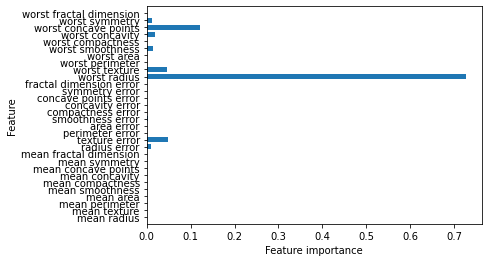

In [11]:
plot_feature_importances_cancer(tree)

Feature importances: [0. 1.]


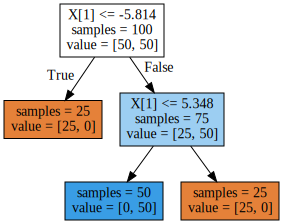

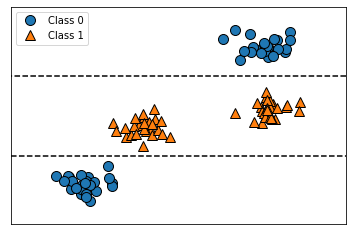

In [12]:
tree = mglearn.plots.plot_tree_not_monotone()
display(tree)

# Advantages and Disadvantages

Usually, picking one of the pre-pruning strategies - setting either max_depth, max_leaf_nodes, or min_samples_leaf is sufficient to prevent overfitting. 

Decision trees have two advantages:
The resulting model can be easily visualized and understood by nonexperts.
The algo are completely invariant to scaling of the data.
As each feature is processed separately, and the possible splits of the data don't depend on scaling, no preprocessing like normalization or standardization of features is needed for decision tree algos. In particular, decision trees works well when you have features that are on completely different scales, or a mix of binary and continuous features.

The main downside of decision trees is that even with the use of pre-pruning, they tend to overfit and provide poor generalization performance. 